## Final Project Submission

Please fill out:
* __Student name:__ Cassarra Groesbeck
* __Student pace:__ Part Time/ Flex
* __Scheduled project review date/time:__ 
* __Instructor name:__ Claude Fried
* __Blog post URL:__


# Introduction 

The goal of this linear regression model is to make inferences as to how renovations can increase the estimated value of a home located in King County WA. A real estate company has tasked me with evaluating what features increase home sales, and by how much. This company is interested in providing homeowners with insightful recommendations about how to invest their renovation dollars to boost the value of their home. They want at least three specific features that boost sale price, and they would like to know by much will each feature increase the value of the home.

## Objectives

Provide a metric describing overall model performance.
Provide at least three features that increase sale price, and by how much

## Business Understanding

The real estate agency needs to provide information to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.
Final recommendations, based on this models coeffiecient values, are listed in section [**Final Recommendations**](#final_recos)



# Data Understanding
This project uses the King County House Sales dataset. For more information, other than what is provided below, see the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

###  Column Names and Descriptions for King County Data Set

<a id='table'></a>


| Column     | Description   |
|------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  `id`         | **Unique identifier for a house**  |
| `date`        | **Date house was sold**  |
| `price`       | **Sale price (prediction target)** |
| `bedrooms`    | **Number of bedrooms**  |
|`bathrooms`    | **Number of bathrooms**   |
|`sqft_living`  | **Square footage of living space in the home**  |
| `sqft_lot`    | **Square footage of the lot**   |
|  `floors`     | **Number of floors (levels) in house**  |
| `waterfront`  | **Whether the house is on a waterfront**  |
| `view`        | **Quality of view from house** |
| `condition`   | **How good the overall condition of the house is. Related to maintenance of house.**  |
| `grade`       | **Overall grade of the house. Related to the construction and design of the house.**  |
| `sqft_above`  | **Square footage of house apart from basement**  |
|`sqft_basement`| **Square footage of the basement**   |
|  `yr_built`   | **Year when house was built**  |
| `yr_renovated`| **Year when house was renovated**  |
| `zipcode`     | **ZIP Code used by the United States Postal Service** |
| `lat`         | **Latitude coordinate**  |
| `long`        | **Longitude coordinate**   |
|`sqft_living15`| **The square footage of interior housing living space for the nearest 15 neighbors**   |
| `sqft_lot15`  | **The square footage of the land lots of the nearest 15 neighbors**   |



# Imports

In [1]:
# The basics
import pandas as pd
import numpy as np

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scipy
import scipy.stats as stats

# rando
from itertools import combinations

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Bring in the data

In [2]:
# data/kc_house_data.csv
data = pd.read_csv("data/kc_house_data.csv")
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


# Functions

In [3]:
# function to fit statsmodel
def model(df, target):
    y = df[target]
    X = df.drop(target, axis=1)

    model = sm.OLS(y, sm.add_constant(X)).fit()
    
    return model

In [4]:
# function to return r_squared values, coeff /p table from .summary, and a 
# couple of residual normality checks (hist and qq plot)

def model_it_small(df, target):
    y = df[target]
    X = df.drop(target, axis=1)
    #statsmodel fit
    model = sm.OLS(y, sm.add_constant(X)).fit()  
    
    #kfold
    regression = LinearRegression()
    crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)
    kfold_r = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
    
    #PLOTS
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))
    fig.suptitle('Normality of Residuals')
    #hist
    sns.histplot(model.resid, ax=ax0)
    ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')
    #qq
    sm.qqplot(model.resid, fit = True, line = '45', ax=ax1)
    ax1.set(title='QQ Plot')
    plt.show()
    
    #print r_squared values
    print(f'r_sq: {model.rsquared}. r_sq_adjusted: {model.rsquared_adj}. k_fold_r: {kfold_r}')
    
    #return 
    return model.summary().tables[1]



In [5]:
# collinearity check function
# code from Multicollinearity of Features - Lab, turned it into a function

def collinearity(df):
    #get absolute value of correlations, sort them, and turn into new DF called df
    df=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

    # zip the columns (Which were only named level_0 and level_1 by default) 
    # into a new column named "pairs"
    df['pairs'] = list(zip(df.level_0, df.level_1))

    # set index to pairs
    df.set_index(['pairs'], inplace = True)

    # drop level_ columns
    df.drop(columns=['level_1', 'level_0'], inplace = True)

    # rename correlation column as cc rather than 0
    df.columns = ['cc']

    # just correlations over .75, but less than 1.
    df = df[(df.cc>.75) & (df.cc <1)]

    df.drop_duplicates(inplace=True) 

    return df

In [6]:
# colinearity with VIF
# code from Linear Regression - Cumulative Lab, altered to make a df w/sorted values

def get_VIFs_above5(df, target):

    vif_data = sm.add_constant(df.drop(target, axis=1))

    vif = [variance_inflation_factor(vif_data.dropna().values, i)\
           for i in range(vif_data.dropna().shape[1])]

    vif_df = pd.DataFrame(vif, index=vif_data.columns).sort_values(0, ascending=False)
    return vif_df[vif_df[0]>5]

In [7]:
# remove outliers from a feature
def remove_outliers(df, column):
    return df[(np.abs(stats.zscore(df[column])) < 3)]

In [8]:
def coeffs_as_percent_df(df, target_variable):
    """
    takes in a pandas dataframe and target_variable 
    (intercept) as a string, ie column name, and returns
    dictionary with target-variable y-intercept and
    predictor coefficients 
    """

    # remove target from df
    predictors = df.drop(target_variable, axis=1)
    
    # import the magic sauce
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(predictors, df[target_variable])
    
    # get the what will become the values
    predictors_coeffs = list(linreg.coef_)

    # give it a new name
    all_values = [f'{round((coeff*100), 2)}%' for coeff in predictors_coeffs]

    # what will become the keys...
    predictor_names = list(predictors.columns)

    # give it a new name
    all_keys = predictor_names

    # zip into dictionary
    coeff_dict = dict(zip(all_keys, all_values))
    
    # make df
    coeff_df = pd.DataFrame(list(coeff_dict.items()))
    
    # rename columns
    coeff_df.rename(columns={0: "coeff", 1: "change_in_target"}, inplace=True)
    
    return coeff_df


In [9]:
# normality check function, returns hist of residuals and qq plot
def normality_check(df, target):
    
    # fit statsmodel with function
    fit_model = model(df, target)
    
    # establish plots
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 5))
    
    # histo
    sns.histplot(fit_model.resid, ax=ax0)
    ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')
    
    # qq plot
    sm.qqplot(fit_model.resid, fit = True, line = '45', ax=ax1)
    ax1.set(title='QQ Plot')
    
    # title for entire thing
    fig.suptitle('Normality of Residuals')
    
    # show me just the plot
    plt.show()

# Exploring the data:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Identify target variable 

In [11]:
target = 'price'

## Extract Catagorical Variables

In [12]:
obj_df = data.select_dtypes(include=object)
obj_df.head()

,date,waterfront,view,condition,grade,sqft_basement
0,10/13/2014,NaN,NONE,Average,7 Average,0.0
1,12/9/2014,NO,NONE,Average,7 Average,400.0
2,2/25/2015,NO,NONE,Average,6 Low Average,0.0
3,12/9/2014,NO,NONE,Very Good,7 Average,910.0
4,2/18/2015,NO,NONE,Average,8 Good,0.0


#### Explore catagorical variables

- [x] `date` (stays categorical)
- [x] `waterfront` (will become boolean)
- [x] `view` (stays categorical)
- [x] `condtion` (stays categorical)
- [x] `grade` (ordinal)
- [x] `sqft_basement` (will become boolean)

### Findings from obj_df exploration:
- `waterfront`
 - has two values: NO & YES
 - has 2376 nulls, that will need to be addressed before ohe'ing
 - 11% of data is null/ missing
 - 0.7% of properties are waterfront
 - 88.3% of properites are not on waterfront
 - I will change nulls to NO due to less than 1% of properties on waterfront
- `condition`
 - 5 unique values
 - has zero nulls
- `view`
 - has 6 values 
 - 89.93% is 'NONE'
 - 63 nulls (0.29%), change to 'NONE' 
- `grade`
 - 11 unique values
 - has numeric value (3-13) and word description (ex "poor" or "good") associated with each grade assignment
 - need to change to just number grade and delete description
- `date` 
 - string: 'mm/dd/yyyy'
- `sqft_basement`
 - float values cast as string
 - 454 missing, shown as '?', 2% missing
 - 12826 '0.0' basement, ie 59% no basement, add new column "has_basement"


**Prep list to get obj_df features get_dummies-ready. I will add to this list as I explore data and will address needed conversions at end before get_dummies.**

1. [x] replace `'waterfront'` {np.nan:'NO'} - this will be a boolean feature
2. [x] change `'view'` nulls to 'NONE' - will stay catagorical
3. [x] keep `'grade'` number and ditch description - this will make the feature ordinal
4. [x] convert `'date'` to just numerical month - then seperate by season, change name to `'season_sold'`
5. [x] for `'sqft_basement'` make new column `'has_basement'` with NO or YES
6. [x] if value '0.0' or '?' append new column NO, else YES - this will be a boolean feature
7. [x] make new get_dummies_df of [`'view'`, `'condition'`, `'has_basement'`, `'waterfront'`]
8. [x] pd.get_dummies(dummies_df, drop_first=True)

<a id='values'></a>
### Column Values and Null Counts:

In [13]:
# print .value_counts() for each column in obj_df
for column in obj_df.columns:
    print(f"COLUMN: '{column}'")
    print(f"Number of unique values: {len(obj_df[column].unique())}")
    print(f"Number of nulls: {obj_df[column].isnull().sum()}")
    print(obj_df[column].value_counts())
    print()

COLUMN: 'date'
Number of unique values: 372
Number of nulls: 0
6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
8/3/2014        1
5/17/2014       1
11/30/2014      1
8/30/2014       1
1/10/2015       1
Name: date, Length: 372, dtype: int64

COLUMN: 'waterfront'
Number of unique values: 3
Number of nulls: 2376
NO     19075
YES      146
Name: waterfront, dtype: int64

COLUMN: 'view'
Number of unique values: 6
Number of nulls: 63
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

COLUMN: 'condition'
Number of unique values: 5
Number of nulls: 0
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

COLUMN: 'grade'
Number of unique values: 11
Number of nulls: 0
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 

In [14]:
#  null counts
obj_df.isnull().sum()

date                0
waterfront       2376
view               63
condition           0
grade               0
sqft_basement       0
dtype: int64

In [15]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           21597 non-null  object
 1   waterfront     19221 non-null  object
 2   view           21534 non-null  object
 3   condition      21597 non-null  object
 4   grade          21597 non-null  object
 5   sqft_basement  21597 non-null  object
dtypes: object(6)
memory usage: 1012.5+ KB


In [16]:
# 'sqft_basement' has '?' for a value ...?
obj_df[['sqft_basement']].head(20)

,sqft_basement
0,0.0
1,400.0
2,0.0
3,910.0
4,0.0
5,1530.0
6,?
7,0.0
8,730.0
9,0.0


In [17]:
#confirm date is string 
type(obj_df['date'][0])

str

### Tackeling get_dummies prep list

In [18]:
# 1. replace 'waterfront' {np.nan:'NO'}
data['waterfront'].replace({np.nan:'NO'}, inplace=True)

#check
data['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [19]:
# 2. change 'view' nulls to 'NONE'
data['view'].fillna('NONE', inplace=True)

#check
data['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [20]:
# 3. keep 'grade' number (as an int) and ditch description
data['grade'] = [int(grade[:2]) for grade in data['grade']]

#check
data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [21]:
# 4. convert 'date' to just numerical month
data['date'] = pd.DatetimeIndex(data['date']).month

# catagorize into seasons
seasons = {1:'winter', 2:'winter', 3:'spring',
          4:'spring', 5:'spring', 6:'summer',
          7:'summer', 8:'summer', 9:'fall',
          10:'fall', 11:'fall', 12:'winter'}
    
data['date'] = data['date'].replace(seasons)

# rename date to what it is
data.rename({'date':'season_sold'}, axis=1, inplace=True)

#check
data['season_sold'].value_counts()

spring    6518
summer    6328
fall      5056
winter    3695
Name: season_sold, dtype: int64

In [22]:
# 5. & 6. for 'sqft_basement' make new column "has_basement"
# if value '0.0' or '?' append new column 0, else 1

basement = []
for square_feet in data['sqft_basement']:
    if square_feet == '0.0':
        basement.append('NO')
    elif square_feet == '?':
        basement.append('NO')
    else:
        basement.append('YES')
        
data['has_basement'] = basement

#drop 'TotalBsmtSF'
data = data.drop('sqft_basement', axis=1)

# check 
data.head()

,id,season_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
0,7129300520,fall,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,NO
1,6414100192,winter,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,YES
2,5631500400,winter,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062,NO
3,2487200875,winter,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,YES
4,1954400510,winter,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,NO


In [23]:
# 7. make new dummies_df of ['view', 'condition']
dummies_df = data[['view','condition', 'has_basement', 'waterfront', 'season_sold']]
dummies_df

,view,condition,has_basement,waterfront,season_sold
0,NONE,Average,NO,NO,fall
1,NONE,Average,YES,NO,winter
2,NONE,Average,NO,NO,winter
3,NONE,Very Good,YES,NO,winter
4,NONE,Average,NO,NO,winter
...,...,...,...,...,...
21592,NONE,Average,NO,NO,spring
21593,NONE,Average,NO,NO,winter
21594,NONE,Average,NO,NO,summer
21595,NONE,Average,NO,NO,winter


In [24]:
# 8. pd.get_dummies(dummies_df, drop_first=True)
dummies_df = pd.get_dummies(dummies_df, drop_first=True)
dummies_df.head()

,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,has_basement_YES,waterfront_YES,season_sold_spring,season_sold_summer,season_sold_winter
0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,1,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,1


### __DUMMIES DROPPED NOTES:__
Take note of the features that have been dropped:
- `'view_AVERAGE'` has been dropped
- `'condition_AVERAGE'` dropped
- `'has_basement_NO'` dropped
- `'waterfront_NO'` dropped
- `'season_sold_fall'` dropped


## Extract Continuous Variables

In [25]:
# extract out columns with Dtype == int or float for further exploration
cont_df = data.select_dtypes(exclude=object).drop(['id', 'price'], axis=1)
cont_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503


### __NOTES:__ 
`'zipcode'` is an integer but should be a catagorical variable. It will need to be transformed somehow before get_dummies and concatenated to `dummies_df`.

In [26]:
# check for nulls 
cont_df.isnull().sum()

bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
grade               0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### __NOTES:__ 
3,842 missing values from `'yr_renovated'`. Thats too many for imputations or replacement. Nulls may mean N/A. Could turn into boolean: 'renovated_YES' == 1

In [27]:
cont_df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

### __NOTES:__ 
An additional 17,011 values of 0, ie 0 likely means N/A and missing values are just that, missing. That is in fact too many for imputations or replacement. I will need to drop this column.

## Converting zip code to cites

In [28]:
data['zipcode'].value_counts() # ohe these? Find way to reduce. 

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

### Web Scrapping for City Zip Codes

__Extract out just zipcode and city from https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033__

In [29]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [30]:
html_page = requests.get('https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033') # Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') # Pass the page contents to beautiful soup for parsing


In [31]:
#soup.prettify

In [32]:
#grab an easy to identify thing
span = soup.find('span')

# move up to find sibling of container I want
parent = span.parent

# get to the correct container
box = parent.next_sibling.next_sibling

# get text from container and format how needed
box_text = box.get_text().replace('\n', ',')
box_text = box_text.replace('Zip CodeCityCounty', '')
box_text = box_text.replace('King County,', '')
box_text = box_text.replace(' ... ', '')

# split on the commas and remove last (empty) element
lst = box_text.split(",")
lst.pop()

#check
lst

['98001',
 'Algona',
 '98001',
 'Auburn',
 '98001',
 'Federal Way',
 '98002',
 'Auburn',
 '98003',
 'Auburn',
 '98003',
 'Federal Way',
 '98004',
 'Beaux Arts Village',
 '98004',
 'Bellevue',
 '98004',
 'Clyde Hill',
 '98004',
 'Hunts Point',
 '98004',
 'Yarrow Point',
 '98005',
 'Bellevue',
 '98006',
 'Bellevue',
 '98007',
 'Bellevue',
 '98008',
 'Bellevue',
 '98009',
 'Bellevue',
 '98010',
 'Black Diamond',
 '98011',
 'Bothell',
 '98013',
 'Burton',
 '98013',
 'Vashon',
 '98014',
 'Carnation',
 '98015',
 'Bellevue',
 '98019',
 'Duvall',
 '98022',
 'Enumclaw',
 '98023',
 'Auburn',
 '98023',
 'Federal Way',
 '98024',
 'Fall City',
 '98025',
 'Hobart',
 '98027',
 'Issaquah',
 '98028',
 'Kenmore',
 '98028',
 'Bothell',
 '98029',
 'Issaquah',
 '98030',
 'Kent',
 '98031',
 'Kent',
 '98032',
 'Kent',
 '98033',
 'Kirkland',
 '98034',
 'Kirkland',
 '98035',
 'Kent',
 '98038',
 'Maple Valley',
 '98039',
 'Medina',
 '98040',
 'Mercer Island',
 '98041',
 'Bothell',
 '98042',
 'Covington',
 '9804

In [33]:
# seperate into two lists: codes and cities
codes = []
cities = []
i=0
for element in lst:
    if i %2 == 0:
        codes.append(element)
        i+=1
    else:
        cities.append(element)
        i+=1

### Make a DF with `code` and `cities` lists

In [34]:
# use the two lists to make a DF
# empty df
web_df = pd.DataFrame()
web_df['zipcode_web']  = codes
web_df['city_web']  = cities

#check
web_df.head()

,zipcode_web,city_web
0,98001,Algona
1,98001,Auburn
2,98001,Federal Way
3,98002,Auburn
4,98003,Auburn


In [35]:
# use DF to make a dict of 
dictionary = {}
for key in web_df['zipcode_web'].unique():
      dictionary[key] = str(web_df[web_df['zipcode_web'] == key]['city_web'].unique())
        
# check
dictionary

{'98001': "['Algona' 'Auburn' 'Federal Way']",
 '98002': "['Auburn']",
 '98003': "['Auburn' 'Federal Way']",
 '98004': "['Beaux Arts Village' 'Bellevue' 'Clyde Hill' 'Hunts Point' 'Yarrow Point']",
 '98005': "['Bellevue']",
 '98006': "['Bellevue']",
 '98007': "['Bellevue']",
 '98008': "['Bellevue']",
 '98009': "['Bellevue']",
 '98010': "['Black Diamond']",
 '98011': "['Bothell']",
 '98013': "['Burton' 'Vashon']",
 '98014': "['Carnation']",
 '98015': "['Bellevue']",
 '98019': "['Duvall']",
 '98022': "['Enumclaw']",
 '98023': "['Auburn' 'Federal Way']",
 '98024': "['Fall City']",
 '98025': "['Hobart']",
 '98027': "['Issaquah']",
 '98028': "['Kenmore' 'Bothell']",
 '98029': "['Issaquah']",
 '98030': "['Kent']",
 '98031': "['Kent']",
 '98032': "['Kent']",
 '98033': "['Kirkland']",
 '98034': "['Kirkland']",
 '98035': "['Kent']",
 '98038': "['Maple Valley']",
 '98039': "['Medina']",
 '98040': "['Mercer Island']",
 '98041': "['Bothell']",
 '98042': "['Covington' 'Kent']",
 '98045': "['North B

### Make new column on exisiting `data` df

In [36]:
type(data['zipcode'][0])

numpy.int64

In [37]:
#copy zipcode to new column
data['Location/Area'] = data['zipcode'].astype(str)

In [38]:
# Use dictionary to replace zipcodes with cities
data['Location/Area'] = data['Location/Area'].replace(dictionary)

__Distill Cities down to Areas__

In [39]:
# use new column (now containing city names) to begin a list of areas
new_values = []
for cities in data['Location/Area']:
    if 'Seattle' in cities:
        new_values.append('Seattle Area')
    elif 'Bellevue' in cities:
        new_values.append('Bellevue Area')
    elif 'Auburn' in cities:
        new_values.append('Auburn Area')
    elif 'Kent' in cities:
        new_values.append('Kent Area')
    else:
        new_values.append(cities)

In [40]:
# change column values from cities to Areas (when possible) otherwise remains city name
data['Location/Area'] = new_values

In [41]:
# check
data['Location/Area'].value_counts()

Seattle Area                8973
Auburn Area                 1690
Bellevue Area               1407
Kent Area                   1201
['Redmond']                  977
['Kirkland']                 977
['Newcastle' 'Renton']       874
['Issaquah']                 733
['Renton']                   723
['Maple Valley']             589
['Sammamish' 'Redmond']      441
['Sammamish' 'Issaquah']     359
['Snoqualmie']               308
['Kenmore' 'Bothell']        283
['Mercer Island']            282
['Woodinville']              273
['Enumclaw']                 233
['North Bend']               220
98077                        198
['Bothell']                  195
['Duvall']                   190
['Carnation']                124
['Vashon']                   117
['Black Diamond']            100
['Fall City']                 80
['Medina']                    50
Name: Location/Area, dtype: int64

### __NOTES:__
- [x] '98077' needs a City name: Woodinville
- [x] if two cites, assign an area
 - [x] Bothell area: Kenmore, _Bothell_
 - [x] Bellevue Area: _Kirkland_
 - [x] Sammamish Area: _Sammamish_, _Issaquah_, _Redmond_
 - [x] Newcastle area: Newcastle, _Renton_

In [42]:
# repeat above, further distilling values from 'Location/Area' column
new_values2 = []
for cities in data['Location/Area']:
    if 'Bothell' in cities:
        new_values2.append('Bothell Area')
    elif 'Kirkland' in cities:
        new_values2.append('Bellevue Area')
    elif 'Renton' in cities:
        new_values2.append('Newcastle Area')
    elif 'Sammamish' in cities:
        new_values2.append('Sammamish Area')
    elif 'Issaquah' in cities:
        new_values2.append('Sammamish Area')
    elif 'Redmond' in cities:
        new_values2.append('Sammamish Area')
    elif cities == '98077':
        new_values2.append('Woodinville')
    else:
        new_values2.append(cities.strip("['']"))

# change column values to new list
data['Location/Area'] = new_values2

# check
data['Location/Area'].value_counts()

Seattle Area      8973
Sammamish Area    2510
Bellevue Area     2384
Auburn Area       1690
Newcastle Area    1597
Kent Area         1201
Maple Valley       589
Bothell Area       478
Woodinville        471
Snoqualmie         308
Mercer Island      282
Enumclaw           233
North Bend         220
Duvall             190
Carnation          124
Vashon             117
Black Diamond      100
Fall City           80
Medina              50
Name: Location/Area, dtype: int64

### __NOTES:__
looks good enough for get_dummies then add to dummies_df

### Get Dummies for new column `data['Location/Area']`

In [43]:
zipcode_dummies = pd.get_dummies(data[['Location/Area']], drop_first=True)

# check and take note of what has been dropped
zipcode_dummies

,Location/Area_Bellevue Area,Location/Area_Black Diamond,Location/Area_Bothell Area,Location/Area_Carnation,Location/Area_Duvall,Location/Area_Enumclaw,Location/Area_Fall City,Location/Area_Kent Area,Location/Area_Maple Valley,Location/Area_Medina,Location/Area_Mercer Island,Location/Area_Newcastle Area,Location/Area_North Bend,Location/Area_Sammamish Area,Location/Area_Seattle Area,Location/Area_Snoqualmie,Location/Area_Vashon,Location/Area_Woodinville
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [44]:
# ahhhh, cant really tell what was dropped: need some code to help
for area in [f'Location/Area_{name}' for name in data['Location/Area'].unique()]:
    if area not in zipcode_dummies.columns:
        print(f"'{area}' has been dropped.")

'Location/Area_Auburn Area' has been dropped.


In [45]:
# concatinate with existing dummies_df
dummies_df = pd.concat([dummies_df, zipcode_dummies], axis=1)

# check
dummies_df

,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,has_basement_YES,waterfront_YES,...,Location/Area_Maple Valley,Location/Area_Medina,Location/Area_Mercer Island,Location/Area_Newcastle Area,Location/Area_North Bend,Location/Area_Sammamish Area,Location/Area_Seattle Area,Location/Area_Snoqualmie,Location/Area_Vashon,Location/Area_Woodinville
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21593,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21594,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21595,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Add the above to 
### __DUMMIES DROPPED NOTES:__
Take note of the features that have been dropped:
- `'view_AVERAGE'` has been dropped
- `'condition_AVERAGE'` dropped
- `'has_basement_NO'` dropped
- `'waterfront_NO'` dropped
- `'Location/Area_Auburn Area'`



## Paring Down Data:
__Get two df's in order__ 

In [46]:
# clean up cont_df (continuous features)

# re define cont_df with relevant columns
relevant_columns = ['price',
                   'bedrooms',
                   'bathrooms',
                   'sqft_living',
                   'sqft_lot',
                   'floors',
                   'grade',
                   'sqft_above',
                   'yr_built',
                   'sqft_living15',
                   'sqft_lot15']
cont_df = data[relevant_columns]

#check
cont_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,7,1180,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,7,2170,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,6,770,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,7,1050,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,8,1680,1987,1800,7503


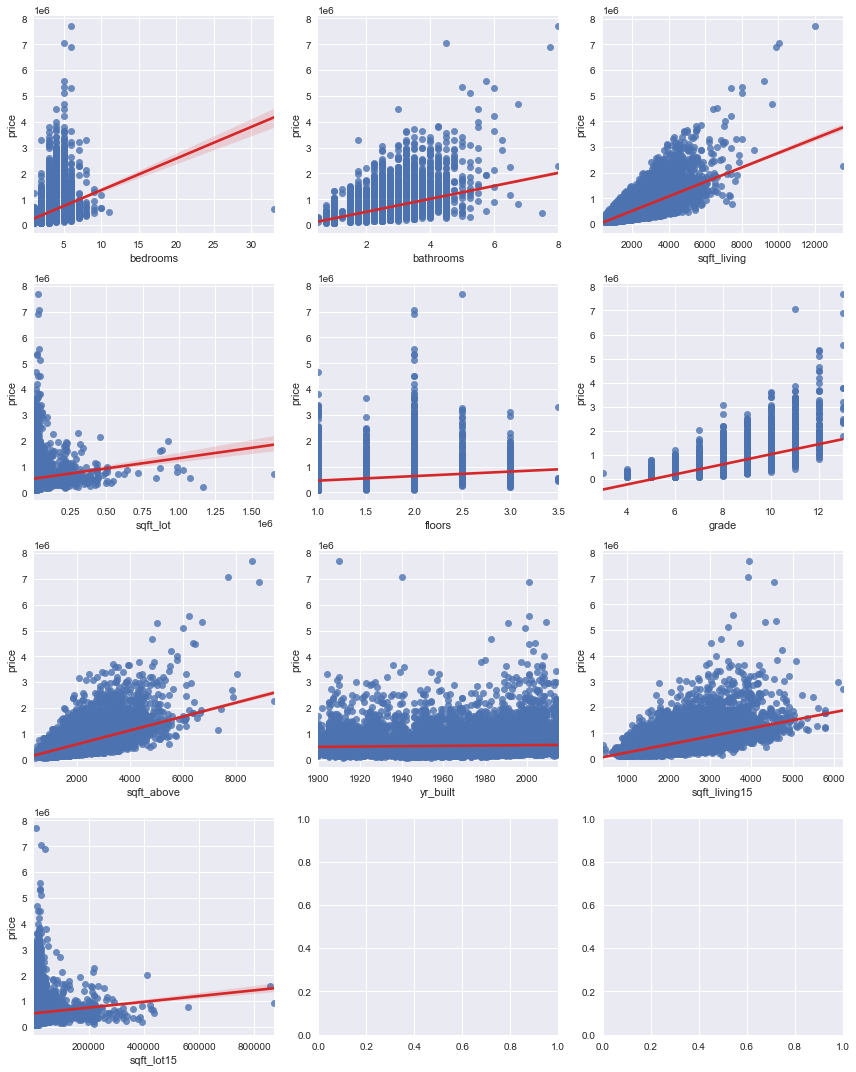

In [47]:
# check continuous features, some maybe catagorical features left in, they are ordinal

#looping over all columns  
plots = cont_df.drop('price', axis=1)

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(12, 15))
fig.set_tight_layout(True)

for index, col in enumerate(plots.columns):
    ax = axes[index//3][index%3]
    sns.regplot(x = col, y = 'price', data = cont_df, ax=ax, line_kws={"color": "tab:red"})
    ax.set_xlabel(col)
    ax.set_ylabel("price")

 ### __NOTES:__
- `'year_built'` is a flat line and has no relationship with `'price'`
- `'floors'` is on the cusp, I will keep for now
- `'bedrooms'`, `'sqft_lot15'`, `'sqft_lot'`, and `'sqft_living'` have obvious outliers


In [48]:
# drop 
cont_df = cont_df.drop('yr_built', axis=1)

#check
cont_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,7,1180,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,7,2170,1690,7639
2,180000.0,2,1.00,770,10000,1.0,6,770,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,7,1050,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,8,1680,1800,7503


In [49]:
# is there really a 30+ bedroom house?
cont_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [50]:
# drop that 1 it's obviously an anomaly 
cont_df = cont_df[cont_df['bedrooms']<30]

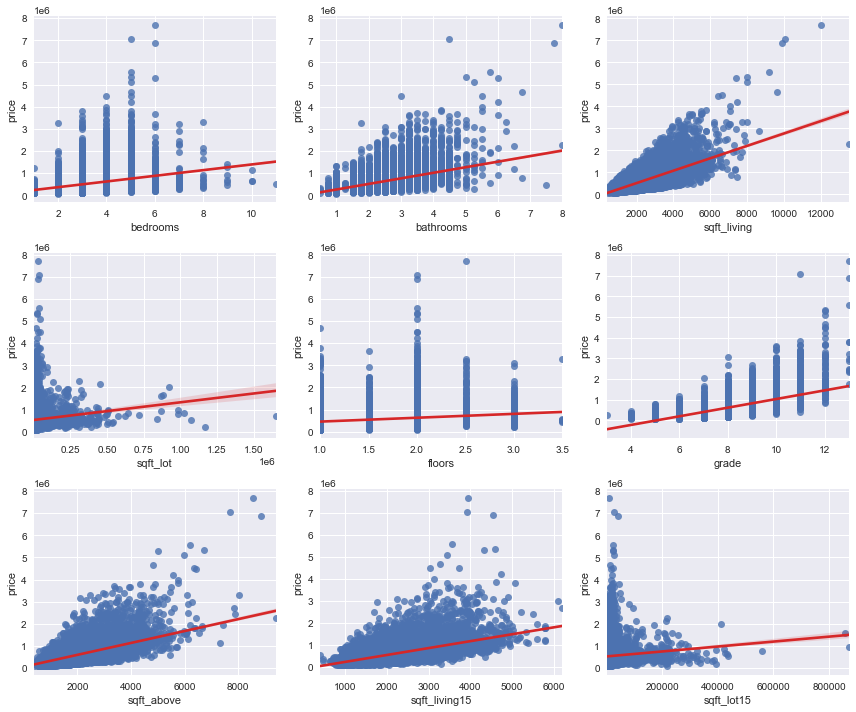

In [51]:
# again, now that 'year_built' have been dropped, and the 33 room house removed
plots = cont_df.drop('price', axis=1)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 10))
fig.set_tight_layout(True)

for index, col in enumerate(plots.columns):
    ax = axes[index//3][index%3]
    sns.regplot(x = col, y = 'price', data = cont_df, ax=ax, line_kws={"color": "tab:red"})
    ax.set_xlabel(col)
    ax.set_ylabel("price")

# Build Baseline Model

### Build baseline model with highest correlated feature

In [52]:
# get absolute value of correllations and sort highest to lowest
cont_df.corr()['price'].abs().sort_values(ascending=False)

price            1.000000
sqft_living      0.701929
grade            0.667964
sqft_above       0.605392
sqft_living15    0.585267
bathrooms        0.525915
bedrooms         0.315961
floors           0.256820
sqft_lot         0.089879
sqft_lot15       0.082849
Name: price, dtype: float64

In [53]:
# use 'sqft_living' as baseline model feature
# baseline model
baseline_model_df = cont_df[['sqft_living', 'price']]

baseline = model(baseline_model_df, target)
baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:48:22   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.401e+04   4410.123     -9.980      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8688      1.939    144.820      0.000     277.067     284.670
==============================================================================
Omnibus:                    14801.492   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542642.481
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

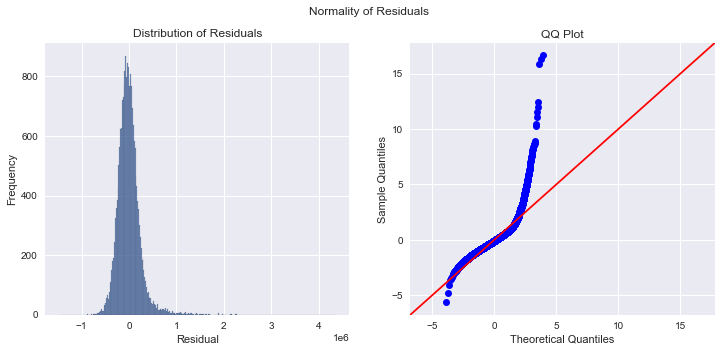

In [54]:
# a look at the residuals
normality_check(baseline_model_df, target)

### __NOTES:__
Clearly there is a problem with the residuals, this is likely due to outliers from the target feature. I will Log transform target to see if the residuals can be more normally distributed.

## Model with log transformed `price_log` as target

In [55]:
cont_df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21596, dtype: float64

In [56]:
# log price and store in new column 'price_log'
cont_df['price_log'] = np.log(cont_df['price'])

In [57]:
# drop 'price' from cont_df
cont_df = cont_df.drop('price', axis=1)

# define new df
base2_model_log = cont_df[['sqft_living', 'price_log']].dropna()

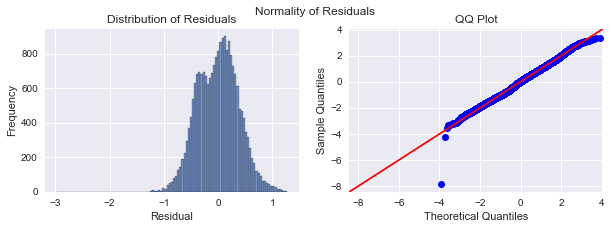

r_sq: 0.48331566140862225. r_sq_adjusted: 0.48329173419094185. k_fold_r: 0.4830740326863596


,coef,std err,t,P>|t|,[0.025,0.975]
const,12.2187,0.006,1915.377,0.000,12.206,12.231
sqft_living,0.0004,2.81e-06,142.125,0.000,0.000,0.000


In [58]:
# redefine target
target = 'price_log'

# model it 
model_it_small(base2_model_log, target)

### __NOTES:__
There is still a couple pretty extreme outliers. This will need to be addressed. But first I will explore dropping outliers instead of log transform. 

In [59]:
# investigate repercussions of blanket outlier removal from price
all_price = len(data["price"])
no_out = len(remove_outliers(data, "price"))
lost = all_price-no_out

print(f'Price feature currently has {all_price} values.')
print(f'If outliers removed it will have {no_out}.')
print(f'That means {lost} would be removed, or {(round(lost/all_price, 2))*100}% dropped.')

Price feature currently has 21597 values.
If outliers removed it will have 21191.
That means 406 would be removed, or 2.0% dropped.


In [60]:
# drop anything outside of 3 std's
price_3std = remove_outliers(data, "price")
price_3std

,id,season_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,Location/Area
0,7129300520,fall,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,NO,Seattle Area
1,6414100192,winter,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,YES,Seattle Area
2,5631500400,winter,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,1933,NaN,98028,47.7379,-122.233,2720,8062,NO,Bothell Area
3,2487200875,winter,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,YES,Seattle Area
4,1954400510,winter,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,NO,Sammamish Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,spring,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,2009,0.0,98103,47.6993,-122.346,1530,1509,NO,Seattle Area
21593,6600060120,winter,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,2014,0.0,98146,47.5107,-122.362,1830,7200,NO,Seattle Area
21594,1523300141,summer,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,NO,Seattle Area
21595,291310100,winter,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,NO,Sammamish Area


## Model with outliers removed from `price` (INSTEAD of log transforming)

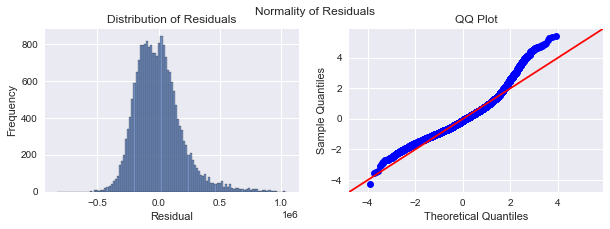

r_sq: 0.441701214930702. r_sq_adjusted: 0.441674866410948. k_fold_r: 0.44127863369031955


,coef,std err,t,P>|t|,[0.025,0.975]
const,8.814e+04,3498.528,25.194,0.000,8.13e+04,9.5e+04
sqft_living,206.0861,1.592,129.475,0.000,202.966,209.206


In [61]:
# model with outliers removed INSTEAD of log transforming
price_3std_model = price_3std[['price', 'sqft_living']]
model_it_small(price_3std_model, 'price')

### __NOTES:__
Log transformation did a better job of normalizing residuals but it had a couple extreme outliers. At this point I can either stick with the outlier removed df (`price_3std`) as it is, I can try log transforming it, or I can try removing outliers from log transformed `cont_df['price_log']`.
 

In [62]:
# explore what would happen if outliers removed form log transformed df
no_out_log = len(remove_outliers(cont_df, target))
removed = all_price - no_out_log

print(f'If outliers removed from log transformed data there will be {no_out_log} data points remaining.')
print(f'Thats {no_out_log - no_out} more than removing outliers from raw data,')
print(f'this would result in {(round(removed/all_price, 2))*100}% of data being removed rather than 2%.')

If outliers removed from log transformed data there will be 21427 data points remaining.
Thats 236 more than removing outliers from raw data,
this would result in 1.0% of data being removed rather than 2%.


### __NOTES:__
I have decided to preserve as much data as possible and I will remove outliers from my logged data (`cont_df['price_log']`).

## Model removing outliers of `cont_df['price_log']`

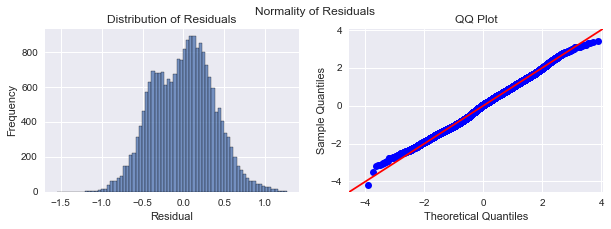

r_sq: 0.4517919301514499. r_sq_adjusted: 0.4517663428436389. k_fold_r: 0.4517066812587575


,coef,std err,t,P>|t|,[0.025,0.975]
const,12.2369,0.007,1871.209,0.000,12.224,12.250
sqft_living,0.0004,2.92e-06,132.879,0.000,0.000,0.000


In [63]:
# remove 3 std from mean
log_3std = remove_outliers(cont_df, target)

# get only highest correlated feature and target
model_log_3std = log_3std[['sqft_living', target]]

# model
model_it_small(model_log_3std, target)

### **NOTES:**
removing outliers 3 std's from mean got rid of the extreme outliers that were skewing the distribution of the residuals.

## Bring in the remaining continuous features and model

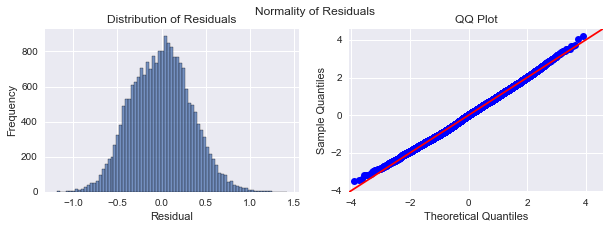

r_sq: 0.5456519988639987. r_sq_adjusted: 0.5454610696017199. k_fold_r: 0.5451343492267143


,coef,std err,t,P>|t|,[0.025,0.975]
const,11.1970,0.021,522.087,0.000,11.155,11.239
bedrooms,-0.0212,0.003,-6.323,0.000,-0.028,-0.015
bathrooms,-0.0260,0.005,-5.004,0.000,-0.036,-0.016
sqft_living,0.0003,7.26e-06,43.616,0.000,0.000,0.000
sqft_lot,3.227e-07,8.05e-08,4.008,0.000,1.65e-07,4.81e-07
floors,0.0654,0.006,11.127,0.000,0.054,0.077
grade,0.1749,0.004,49.522,0.000,0.168,0.182
sqft_above,-0.0002,7.03e-06,-25.683,0.000,-0.000,-0.000
sqft_living15,0.0001,5.72e-06,18.170,0.000,9.26e-05,0.000
sqft_lot15,-7.591e-07,1.23e-07,-6.169,0.000,-1e-06,-5.18e-07


In [64]:
model_it_small(log_3std, target)

### **NOTES:**
All the p values are less than .05, this is great. I will bring in the remaining (catagorical) variables. 

## Bring in the other catagorical features and model with the remaining features

In [65]:
# concat cont_df to dummies_df
model_log = pd.concat([log_3std, dummies_df], axis=1).dropna(axis=0)

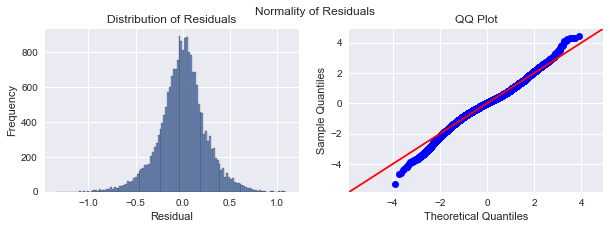

r_sq: 0.7515903132860757. r_sq_adjusted: 0.7511256921568998. k_fold_r: 0.7504348941873448


,coef,std err,t,P>|t|,[0.025,0.975]
const,11.0001,0.020,536.910,0.000,10.960,11.040
bedrooms,-0.0084,0.003,-3.344,0.001,-0.013,-0.003
bathrooms,0.0199,0.004,5.033,0.000,0.012,0.028
sqft_living,9.408e-05,7.81e-06,12.045,0.000,7.88e-05,0.000
sqft_lot,5.844e-07,6e-08,9.735,0.000,4.67e-07,7.02e-07
floors,0.0528,0.005,11.665,0.000,0.044,0.062
grade,0.1254,0.003,46.346,0.000,0.120,0.131
sqft_above,8.042e-05,8.46e-06,9.506,0.000,6.38e-05,9.7e-05
sqft_living15,9.578e-05,4.5e-06,21.292,0.000,8.7e-05,0.000
sqft_lot15,-1.929e-07,9.39e-08,-2.055,0.040,-3.77e-07,-8.93e-09


In [66]:
model_it_small(model_log, target)

### __NOTES:__
Features with p_values above .05 and CI that spans 0:
- `season_sold_winter`
- `season_sold_summer`
- `view_FAIR`

# Remodel with above features removed 

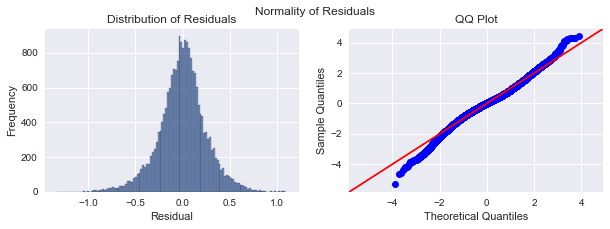

r_sq: 0.7515740272644715. r_sq_adjusted: 0.7511442848271807. k_fold_r: 0.7506086620157172


,coef,std err,t,P>|t|,[0.025,0.975]
const,11.0057,0.020,555.693,0.000,10.967,11.045
bedrooms,-0.0084,0.003,-3.340,0.001,-0.013,-0.003
bathrooms,0.0199,0.004,5.032,0.000,0.012,0.028
sqft_living,9.405e-05,7.81e-06,12.042,0.000,7.87e-05,0.000
sqft_lot,5.844e-07,6e-08,9.737,0.000,4.67e-07,7.02e-07
floors,0.0527,0.005,11.651,0.000,0.044,0.062
grade,0.1253,0.003,46.344,0.000,0.120,0.131
sqft_above,8.048e-05,8.46e-06,9.513,0.000,6.39e-05,9.71e-05
sqft_living15,9.579e-05,4.5e-06,21.300,0.000,8.7e-05,0.000
sqft_lot15,-1.942e-07,9.38e-08,-2.069,0.039,-3.78e-07,-1.02e-08


In [67]:
Ps_dropped1 = model_log.drop(['season_sold_winter', 
                              'season_sold_summer', 
                              'view_FAIR'], axis=1)
model_it_small(Ps_dropped1, target)

### __NOTES:__
All p_values below .05. I will move on to check for multicollinearity 

## Multicollinearity of Features 

In [68]:
collinearity(Ps_dropped1)

,cc
pairs,
"(sqft_living, sqft_above)",0.868973
"(sqft_living, sqft_living15)",0.755058
"(grade, sqft_living)",0.751284


In [69]:
get_VIFs_above5(Ps_dropped1, target)

,0
const,133.428120
sqft_living,15.708403
sqft_above,15.485226


# Remodel  dropping `sqft_above`

In [70]:
drop_collin_feature = Ps_dropped1.drop('sqft_above', axis=1).dropna(axis=0)

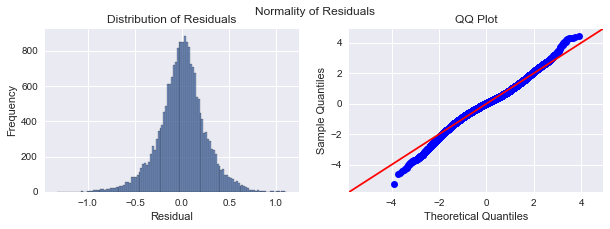

r_sq: 0.7505228489838107. r_sq_adjusted: 0.7501029715907961. k_fold_r: 0.7495767607350553


,coef,std err,t,P>|t|,[0.025,0.975]
const,10.9872,0.020,556.308,0.000,10.948,11.026
bedrooms,-0.0089,0.003,-3.551,0.000,-0.014,-0.004
bathrooms,0.0190,0.004,4.796,0.000,0.011,0.027
sqft_living,0.0002,4.43e-06,35.056,0.000,0.000,0.000
sqft_lot,6.014e-07,6.01e-08,10.004,0.000,4.84e-07,7.19e-07
floors,0.0645,0.004,14.789,0.000,0.056,0.073
grade,0.1290,0.003,48.091,0.000,0.124,0.134
sqft_living15,0.0001,4.48e-06,22.422,0.000,9.17e-05,0.000
sqft_lot15,-1.942e-07,9.4e-08,-2.065,0.039,-3.79e-07,-9.89e-09
view_EXCELLENT,0.1223,0.020,6.258,0.000,0.084,0.161


In [71]:
model_it_small(drop_collin_feature, target)

### __NOTES:__
P values look good, I will re check collinearity now that `sqft_above` has been deleted

In [72]:
collinearity(drop_collin_feature)

,cc
pairs,
"(sqft_living15, sqft_living)",0.755058
"(sqft_living, grade)",0.751284


In [73]:
get_VIFs_above5(drop_collin_feature, target)

,0
const,132.131585
sqft_living,5.033025


### __NOTES:__
`sqft_living` slighlty above 5. I do not want to delete this feature. The above cell shows `sqft_living15` correlating with 'sqft_living'. This feature is not specific to the home and has to do with the 15 houses nearest. I will delete this feture and re check VIF's. 

In [74]:
# drop sqft_living15
drop_living15 = drop_collin_feature.drop('sqft_living15', axis=1)

# check vif's
get_VIFs_above5(drop_living15, target)

,0
const,131.448838


### __NOTES:__
Great! there are no features with VIF greater than 5

# Model with `sqft_living15` dropped

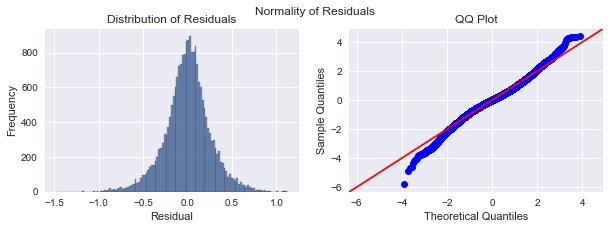

r_sq: 0.744659414074024. r_sq_adjusted: 0.7442416252606254. k_fold_r: 0.743680564946847


,coef,std err,t,P>|t|,[0.025,0.975]
const,11.0190,0.020,552.920,0.000,10.980,11.058
bedrooms,-0.0103,0.003,-4.070,0.000,-0.015,-0.005
bathrooms,0.0140,0.004,3.516,0.000,0.006,0.022
sqft_living,0.0002,4.1e-06,47.573,0.000,0.000,0.000
sqft_lot,5.309e-07,6.07e-08,8.741,0.000,4.12e-07,6.5e-07
floors,0.0580,0.004,13.177,0.000,0.049,0.067
grade,0.1460,0.003,56.141,0.000,0.141,0.151
sqft_lot15,-5.975e-08,9.49e-08,-0.629,0.529,-2.46e-07,1.26e-07
view_EXCELLENT,0.1345,0.020,6.805,0.000,0.096,0.173
view_GOOD,0.0359,0.014,2.636,0.008,0.009,0.063


In [75]:
model_it_small(drop_living15, target)

### __NOTES:__
`sqft_lot15` p_value grow to 0.529. Additionally, `condition_Poor` is .097. This feature needs to be deleted but I will need to also delete `condition_Fair` so the remaining feature coefficients will show changes in comparison to `condtion_Average` and below

# Remodel with `sqft_lot15`, `condition_Poor`, and `condition_Fair` dropped

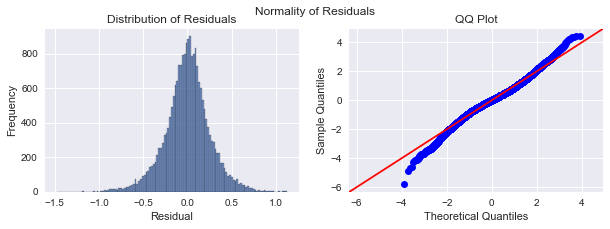

r_sq: 0.7440893856823959. r_sq_adjusted: 0.7437066082841457. k_fold_r: 0.7433070844601949


,coef,std err,t,P>|t|,[0.025,0.975]
const,11.0063,0.020,554.746,0.000,10.967,11.045
bedrooms,-0.0101,0.003,-3.970,0.000,-0.015,-0.005
bathrooms,0.0148,0.004,3.693,0.000,0.007,0.023
sqft_living,0.0002,4.09e-06,47.527,0.000,0.000,0.000
sqft_lot,4.907e-07,4.58e-08,10.703,0.000,4.01e-07,5.81e-07
floors,0.0589,0.004,13.384,0.000,0.050,0.068
grade,0.1471,0.003,56.643,0.000,0.142,0.152
view_EXCELLENT,0.1331,0.020,6.731,0.000,0.094,0.172
view_GOOD,0.0354,0.014,2.597,0.009,0.009,0.062
view_NONE,-0.1127,0.008,-14.653,0.000,-0.128,-0.098


In [76]:
# drop 'sqft_lot15' from drop_living15
Ps_dropped2 = drop_living15.drop(['sqft_lot15', 'condition_Poor', 'condition_Fair'], axis=1)

# model it 
model_it_small(Ps_dropped2, target)

### __NOTES:__
Great, the p_values are in a good place again. Try adding interactions to boost r_squared

# Interactions

In [77]:
X = Ps_dropped2.drop(target, axis=1)
y = Ps_dropped2[target]

regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

features = list(X.columns)
combos = combinations(features, 2)
r_2s_dict = {pair:None for pair in combos}

# use pairs list and find r_2's
for k,v in r_2s_dict.items():
    
    # make copy of df so you don't mess anything up
    X_interact = X.copy()
    
    # use pairs
    # new column in X_interact with product of predictors
    X_interact[f'{k}'] = X[f'{k[0]}'] * X[f'{k[1]}']
    # r2 with combo feature added
    r_2_with_interaction = np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))
    # store r_2 and pair in a dictionary
    r_2s_dict[k] = r_2_with_interaction
    

# sort by r_2 kfold value and extract top 3 pairs (the last 3)
top_3 = dict(sorted(r_2s_dict.items(), key=lambda item: item[1])[-3:])

top_3

{('sqft_living', 'grade'): 0.7475977708951005,
 ('sqft_lot', 'Location/Area_Seattle Area'): 0.7497595589146734,
 ('grade', 'Location/Area_Seattle Area'): 0.7506927609011683}

### Add top interaction

In [78]:
# redefine X so this cell can run multiple times
X = Ps_dropped2.drop(target, axis=1)

# add interaction columns to df 
X["'grade'*'Location/Area_Seattle Area'"] = X['grade'] * X['Location/Area_Seattle Area']

#  Model with interactions added

In [79]:
# add target into X df
X[target] = Ps_dropped2[target]

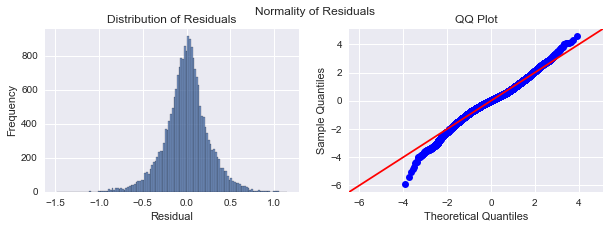

r_sq: 0.7513726444980751. r_sq_adjusted: 0.7509891217227952. k_fold_r: 0.7506927609011683


,coef,std err,t,P>|t|,[0.025,0.975]
const,11.2679,0.022,508.172,0.000,11.224,11.311
bedrooms,-0.0153,0.003,-6.092,0.000,-0.020,-0.010
bathrooms,0.0085,0.004,2.147,0.032,0.001,0.016
sqft_living,0.0002,4.12e-06,52.259,0.000,0.000,0.000
sqft_lot,5.415e-07,4.52e-08,11.971,0.000,4.53e-07,6.3e-07
floors,0.0431,0.004,9.823,0.000,0.034,0.052
grade,0.1130,0.003,38.975,0.000,0.107,0.119
view_EXCELLENT,0.1107,0.020,5.673,0.000,0.072,0.149
view_GOOD,0.0260,0.013,1.934,0.053,-0.000,0.052
view_NONE,-0.0986,0.008,-12.965,0.000,-0.113,-0.084


In [80]:
model_it_small(X, target)

### __NOTES:__
R squared did get boosted but the distribution is noticably worse and `view_GOOD` p grew to .053. I will drop interactions and use `Ps_dropped2` as my final model. I will investigate remaining assumptions (normality assumption covered by hist and qq plot print out with `Ps_dropped2` model.

# FINAL MODEL

In [81]:
final_model = model(Ps_dropped2, target)
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     1944.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:49:27   Log-Likelihood:                -1082.4
No. Observations:               21427   AIC:                             2231.
Df Residuals:                   21394   BIC:                             2494.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           11.0063      0.020    554.746      0.000      10.967      11.045
bedrooms                        -0.0101      0.003     -3.970      0.000      -0.015      -0.005
bathrooms                        0.0148      0.004      3.693      0.000       0.007       0.023
sqft_living                      0.0002   4.09e-06     47.527      0.000       0.000       0.000
sqft_lot                      4.907e-07   4.58e-08     10.703      0.000    4.01e-07    5.81e-07
floors                           0.0589      0.004     13.384      0.000       0.050       0.068
grade                            0.1471      0.003     56.643      0.000       0.142       0.152
view_EXCELLENT                   0.1331      0.020      6.731      0.000       0.094       0.172
view_GOOD                        0.0354      0.014      2.597      0.009       0.009       0.062
view_NONE                       -0.1127      0.008    -14.653      0.000      -0.128      -0.098
condition_Good                   0.0846      0.004     19.752      0.000       0.076       0.093
condition_Very Good              0.1787      0.007     26.326      0.000       0.165       0.192
has_basement_YES                 0.0340      0.004      7.925      0.000       0.026       0.042
waterfront_YES                   0.3046      0.029     10.389      0.000       0.247       0.362
season_sold_spring               0.0472      0.004     12.413      0.000       0.040       0.055
Location/Area_Bellevue Area      0.6886      0.008     83.319      0.000       0.672       0.705
Location/Area_Black Diamond      0.2712      0.026     10.311      0.000       0.220       0.323
Location/Area_Bothell Area       0.4357      0.013     32.944      0.000       0.410       0.462
Location/Area_Carnation          0.3318      0.024     13.753      0.000       0.285       0.379
Location/Area_Duvall             0.3437      0.020     17.539      0.000       0.305       0.382
Location/Area_Enumclaw           0.0737      0.018      4.070      0.000       0.038       0.109
Location/Area_Fall City          0.4602      0.029     15.639      0.000       0.403       0.518
Location/Area_Kent Area          0.0565      0.010      5.862      0.000       0.038       0.075
Location/Area_Maple Valley       0.1803      0.012     14.661      0.000       0.156       0.204
Location/Area_Medina             1.2813      0.045     28.568      0.000       1.193       1.369
Location/Area_Mercer Island      0.8284      0.017     48.472      0.000       0.795       0.862
Location/Area_Newcastle Area     0.2502      0.009     28.052      0.000       0.233       0.268
Location/Area_North Bend         0.3372      0.018     18.366      0.000       0.301       0.373
Location/Area_Sammamish Area     0.5578      0.008     67.870      0.000    

### Investigating Linearity

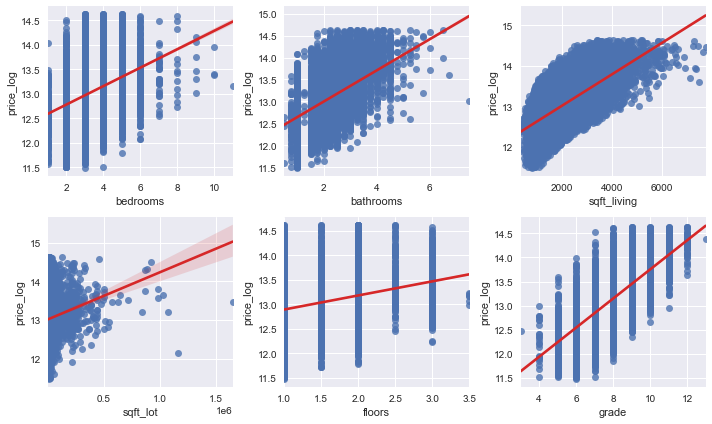

In [82]:
# Linearity?
x = Ps_dropped2[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade', 'price_log']]
plots = x.drop(target, axis=1)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 6))
fig.set_tight_layout(True)

for index, col in enumerate(plots.columns):
    ax = axes[index//3][index%3]
    sns.regplot(x = col, y = target, data = x, ax=ax, line_kws={"color": "tab:red"})
    ax.set_xlabel(col)
    ax.set_ylabel("price_log")

### Investigating Homoscedasticity

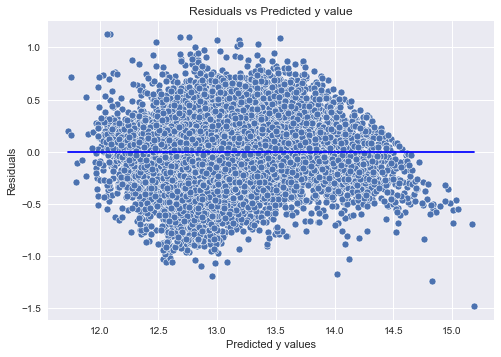

In [83]:
# plot the residuals against predicted values
y_pred = final_model.fittedvalues

# check for homoscedasticity
p = sns.scatterplot(x=y_pred,y=final_model.resid)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')
#plt.xlim(70,100)
p = sns.lineplot(x=[y_pred.min(),y_pred.max()],y=[0,0],color='blue')
p = plt.title('Residuals vs Predicted y value')

### Just for funnsies here is a reminder of the Normality check

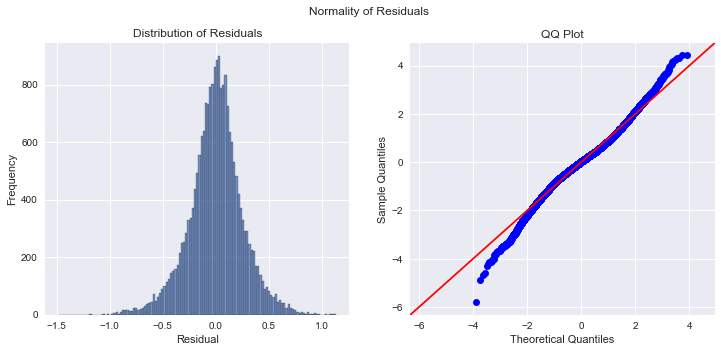

In [84]:
normality_check(Ps_dropped2, target)

### Investigating Multicollinearity (Independence Assumption)

In [85]:
collinearity(Ps_dropped2)

,cc
pairs,
"(grade, sqft_living)",0.751284


In [86]:
get_VIFs_above5(Ps_dropped2, target)

,0
const,130.0123


### __NOTES:__
Perfect, there are no VIF values above 5!

# Final Recommendations:

In [87]:
# predictor coeffiecients as percent change
coeffs_as_percent_df(Ps_dropped2, target)

,coeff,change_in_target
0,bedrooms,-1.01%
1,bathrooms,1.48%
2,sqft_living,0.02%
3,sqft_lot,0.0%
4,floors,5.89%
5,grade,14.71%
6,view_EXCELLENT,13.31%
7,view_GOOD,3.54%
8,view_NONE,-11.27%
9,condition_Good,8.46%


<a id='final_recos'></a>

### Renovations should be focused on upgrading Condition and Grade of the home. Additionally, adding a floor will increase value. 

The top ways renovations can increase home value: 
-	__Upgrading home _Condition_ from AVERAGE (or below) to GOOD will increase home value by 8.3%__
-	__Improvement in _Condition_ from AVERAGE (or below) to VERY GOOD will increase value by 17.87%__
-	__For every increase in _Grade_ level, the home value will increase by 14.71%__
- __For every additional _floor_, home value increases by 5.89%__
 

Below I have placed reminders of the description of _GRADE_ and _CONDITION_ from [table](#table) at top of this notebook. As well as additional information from the King County [Residential Glossary of Terms](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#top), and the [values](#values) from the data.


__GRADE__: _Overall grade of the house. Related to the construction and design of the house. Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. (See Glossary in Area Report for Residential Building Grades in use by the King County Department of Assessments.)_  

Classifications:
- 3 – Poor
- 4 – Low
- 5 – Fair
- 6 – Low Average
- 7 – Average
- 8 – Good 
- 9 - Better         
- 10 - Very Good    
- 11 - Excellent     
- 12 - Luxury          
- 13 - Mansion        

__CONDITION__: _How good the overall condition of the house is. Related to maintenance of house._ 

Classifications:
- Average     
- Good         
- Very Good     
- Fair           
- Poor            



# Conclusions on Final Model

The p values are important, they are a measurement of how likely your coefficient is measured through our model by chance. However, they are not the only value to focus on. 
R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In our case, the *r squared* value of .744 tells us this final linear regression model is able to explain 74.4% of the variability observed in Sale Price. Because *r squared* will always increase as features are added, in this case 34 as shown in *Df Model*, we should also look to the *adjusted r squared* to get a better understanding of how the model is performing. *Adjusted r squared* takes into account the number of features in the model by penalizing the R-squared formula based on the number of variables. If the two were significantly different it could be that some variables are not contributing to your model’s R-squared properly. In this case, the *adjusted r squared* is the same as the *r squared* so we can be confident in the 76% reliability, as stated above, of this model. The f statistic is also important. More easily understood is the prob(f-statistic), it uses the F statistic to tell the accuracy of the null hypothesis, or whether it is accurate that the variables’ effect is 0. In our case, it is telling us 0.00% chance of this. I'd like to tighten up the normality distribution of residuals, suggests on how to acomplish that are below, but based on values mention, I feel confident in the recommendations.


# Next Steps
Ways to possibly improve recommendations to the average homeowner (appealing to the broadest possible range of clients):
- Starting with sqft_lot, remove outliers from features, one by one, modeling between each, and try to eliminate the outlying residuals and improve normality. 

- There is a huge range in location coefficients. Intuitively this makes sense since city homes often sell at a higher price. I would like to split properties into urban and rural locations to explore this attribute to get more accurate findings based on location. That is to say, do rural home buyers want different features in their homes compared to city buyers? Does the estimated increase in value change with location?

- Building on that divide (between urban and rural), I would like to find the price per sq foot of living and explore if homes (on average) fall nicely into this assumption that rural homes are cheaper per square foot of living. Specifically looking to add a greater degree of accuracy in how much renovations will increase home value. Another way to explore a possible similar attribute of rural homes vs urban homes is comparing square foot lot to square foot living. 

- On that same note I'd like to find the number of bathrooms per square foot living, and similarly, number of bedrooms per square foot. Trying to weed out the extreme outliers of mansion type homes. What might be considered excessivly large in a city could be normal in a rural location.  

- Because only conditions 'Good' and 'Very Good' remained, I would like to make this feature binary as "condition_above_average" so that it is more interpretable.

## Thank you!
__Email:__ cassigroesbeck@gmail.com

__GitHub:__ @AgathaZareth

__LinkedIn:__ linkedin.com/in/cassarra-groesbeck-a64b75229